In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from  sklearn.metrics  import accuracy_score
import warnings
warnings.filterwarnings('ignore')
data=pd.read_csv("C:/Users/dcb/Diabetes Prediction/Diabetes-Readmission-Prediction/diabetic_data_initial.csv")
data.head(5)

#this dataset is not in a good way, requires signifcant formating

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      101766 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            10176

In [4]:
data.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [5]:
#remove column with nulls and ID column
data.drop(data.columns[[0,1]], axis=1, inplace=True)
cols = data.columns
data[cols] = data[cols].replace({'?':np.nan, 0:np.nan})

#lets flag some strongly correlated diagnosis codes (added after score not great)
diag_codes =["428","403","491","585","250.6","250.4","536","250.41","250.42"]

data['diagflag'] = data.isin(diag_codes).any(1).astype(int)

data = data.drop(['diag_1','diag_2', 'diag_3','citoglipton', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone',
                  'chlorpropamide', 'acetohexamide', 'tolbutamide', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton'], axis=1)

#Recode yes/no variables to numeric
data['diabetesMed']=data['diabetesMed'].map(dict(Yes=1, No=0))
data['change']=data['change'].map(dict(Ch=1, No=0))


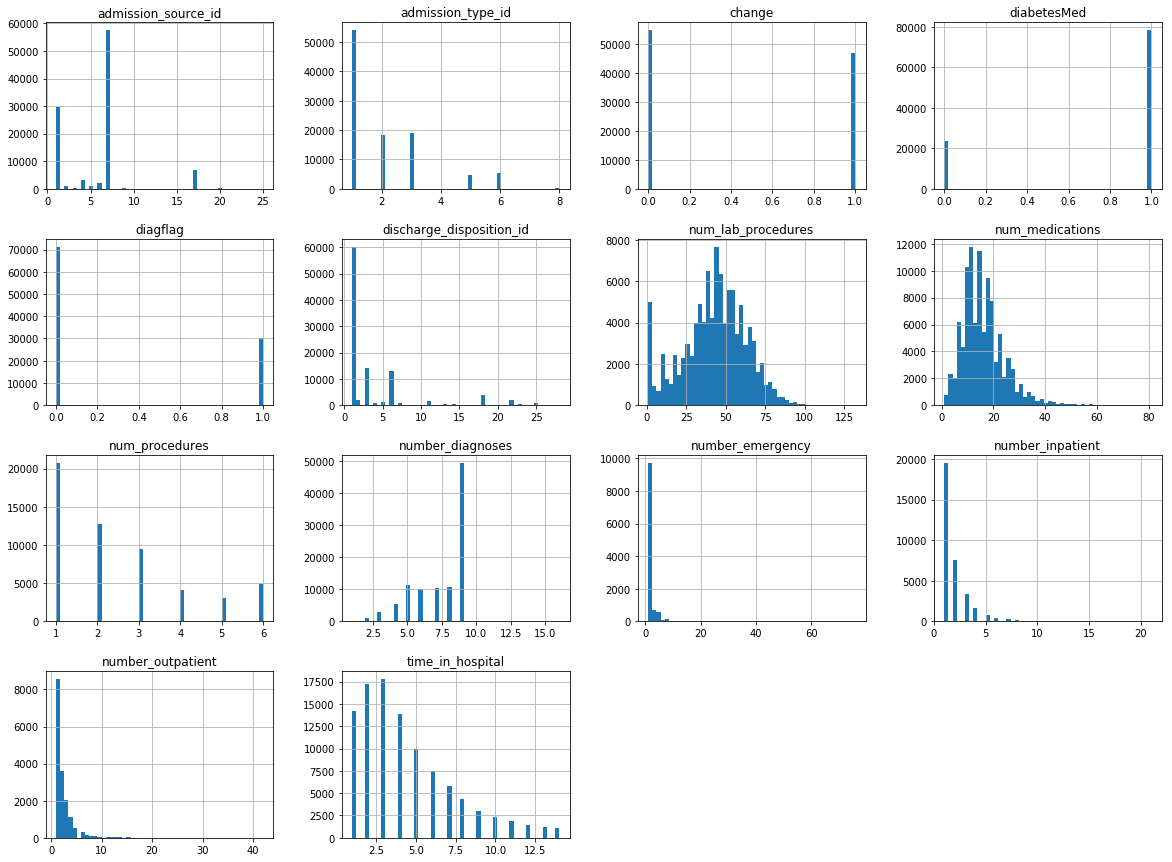

In [6]:
#plotting the numeric variables 
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15))
plt.show()

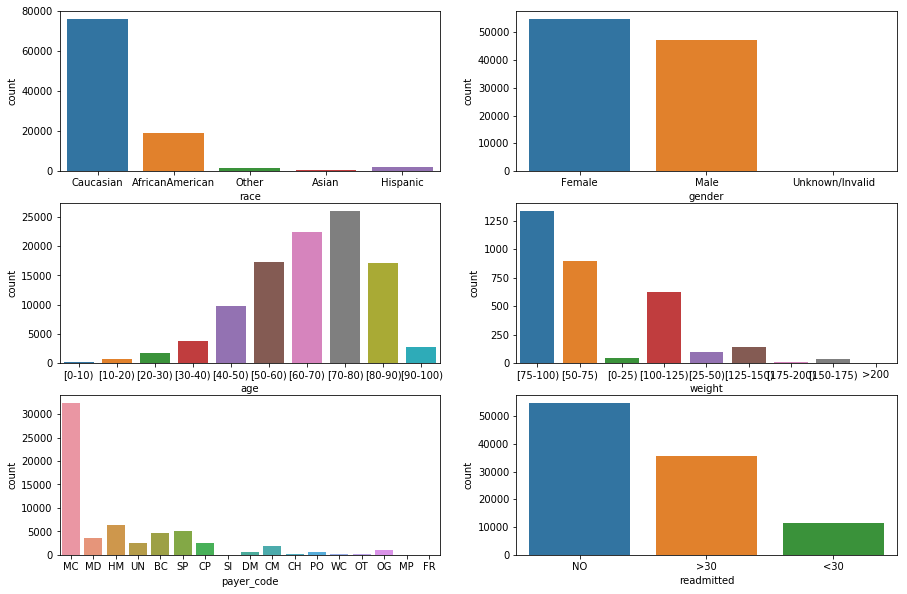

In [7]:
# lplotting the categorical variables
import seaborn as sns

fig, ax = plt.subplots(figsize=(15,10), ncols=2, nrows=3)
# plot
sns.countplot(x="race", data=data, ax=ax[0][0])
sns.countplot(x="gender", data=data, ax=ax[0][1])
sns.countplot(x="age", data=data, ax=ax[1][0])
sns.countplot(x="weight", data=data, ax=ax[1][1])
sns.countplot(x="payer_code", data=data, ax=ax[2][0])
sns.countplot(x="readmitted", data=data, ax=ax[2][1])

In [8]:
#create dummy variables for modelling
target=data["readmitted"]
data=pd.get_dummies(data.loc[:, data.columns != "readmitted"])

In [9]:
data['target']=target

In [10]:
#split dataset for training and testing
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

In [11]:
# check incomplete data, to get an idea of what we are going to impute
numeric_data=train_set._get_numeric_data()
sample_incomplete_rows = numeric_data[numeric_data.isnull().any(axis=1)].head()
sample_incomplete_rows

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,acarbose_Steady,acarbose_Up,insulin_Down,insulin_No,insulin_Steady,insulin_Up,glyburide-metformin_Down,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up
24079,1.0,1.0,7.0,4.0,48.0,NaN,11.0,NaN,NaN,NaN,...,0,0,0,1,0,0,0,1,0,0
98079,1.0,1.0,7.0,1.0,42.0,NaN,5.0,NaN,NaN,NaN,...,0,0,0,1,0,0,0,1,0,0
6237,1.0,1.0,7.0,4.0,44.0,NaN,10.0,NaN,NaN,NaN,...,0,0,0,1,0,0,0,1,0,0
72208,1.0,3.0,7.0,3.0,54.0,NaN,8.0,NaN,NaN,NaN,...,0,0,0,0,1,0,0,1,0,0
33075,1.0,11.0,7.0,11.0,35.0,3.0,23.0,NaN,NaN,1.0,...,0,0,0,1,0,0,0,1,0,0


In [12]:
#impute the numeric data using the imputer, will visit for more specific imputing but best to get a model running first.
has_missing=numeric_data.columns[numeric_data.isna().any()].tolist()
for c in has_missing:
    median = train_set[c].median()
    train_set[c].fillna(median, inplace=True) # option 3

train_set.head(5)

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,acarbose_Up,insulin_Down,insulin_No,insulin_Steady,insulin_Up,glyburide-metformin_Down,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up,target
24079,1.0,1.0,7.0,4.0,48.0,2.0,11.0,1.0,1.0,1.0,...,0,0,1,0,0,0,1,0,0,NO
98079,1.0,1.0,7.0,1.0,42.0,2.0,5.0,1.0,1.0,1.0,...,0,0,1,0,0,0,1,0,0,>30
6237,1.0,1.0,7.0,4.0,44.0,2.0,10.0,1.0,1.0,1.0,...,0,0,1,0,0,0,1,0,0,NO
72208,1.0,3.0,7.0,3.0,54.0,2.0,8.0,1.0,1.0,1.0,...,0,0,0,1,0,0,1,0,0,NO
33075,1.0,11.0,7.0,11.0,35.0,3.0,23.0,1.0,1.0,1.0,...,0,0,1,0,0,0,1,0,0,NO


In [13]:
#creating a pipeline so the data can be easily processed for the train and test set.

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import Imputer
from sklearn.pipeline import TransformerMixin
    
class DataFrameSelectorCat(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].astype(str)

# Create a class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

cols = train_set.columns
num_attribs = train_set._get_numeric_data().columns
cols_list=list(cols)
cat_attribs = [x for x in cols_list if x not in num_attribs]
#cat_attribs =['weight','gender','race']

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', Imputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

cat_pipeline = Pipeline([
        ('selector', DataFrameSelectorCat(cat_attribs)),
        #('smarties', Smarties()),
        #('label_binarizer', MultiColumnLabelEncoder()),
    ])

data_num_tr = num_pipeline.fit_transform(numeric_data)
data_num_tr

array([[-0.70810806, -0.5136588 ,  0.30695872, ...,  0.08478111,
        -0.0838205 , -0.00991339],
       [-0.70810806, -0.5136588 ,  0.30695872, ...,  0.08478111,
        -0.0838205 , -0.00991339],
       [-0.70810806, -0.5136588 ,  0.30695872, ...,  0.08478111,
        -0.0838205 , -0.00991339],
       ...,
       [ 0.67957442, -0.13560719, -1.17014442, ...,  0.08478111,
        -0.0838205 , -0.00991339],
       [ 2.76109813,  4.02296059,  0.30695872, ...,  0.08478111,
        -0.0838205 , -0.00991339],
       [ 2.76109813, -0.5136588 ,  2.76879729, ...,  0.08478111,
        -0.0838205 , -0.00991339]])

In [14]:
data_cat_tr=cat_pipeline.fit_transform(train_set)
#data_cat_tr=(df.apply(LabelEncoder().fit_transform))


In [15]:
#combine the two pipelines
from sklearn.pipeline import FeatureUnion
full_pipeline = FeatureUnion(transformer_list=[
 ("num_pipeline", num_pipeline),
 ("cat_pipeline", cat_pipeline),
 ])

In [16]:
#put training set through the pipeline
train_prepared = full_pipeline.fit_transform(train_set)
train_prepared.shape

(81412, 183)

In [17]:
#define target variable
y_train=train_prepared[:, 182]
y_train

array(['NO', '>30', 'NO', ..., 'NO', '>30', 'NO'], dtype=object)

In [18]:
#remove target variable from training
x_train=train_prepared[:,:182]
x_train.shape

(81412, 182)

In [18]:
#logistic regression
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=5, random_state=42)
sgd_clf.fit(x_train, y_train)
y_pred=sgd_clf.predict(x_train)

In [19]:
accuracy_score(y_train, y_pred)

0.5066206456050705

In [19]:
#Running the test data through pipeline
test_prepared = full_pipeline.transform(test_set)
test_prepared.shape

(20354, 183)

In [20]:
#create target and training set
y_test=test_prepared[:, 182]
x_test=test_prepared[:,:182]

In [22]:
#predict. Not a good score!
y_test_pred=sgd_clf.predict(x_test)
accuracy_score(y_test, y_test_pred)

0.49926304411909206

In [23]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(x_train, y_train)
y_pred=forest_clf.predict(x_train)
accuracy_score(y_train, y_pred)

0.9870903552301872

In [24]:
#Good Score of training, but not so good on test
y_test_pred=forest_clf.predict(x_test)
accuracy_score(y_test, y_test_pred)

0.5315908420949199

In [25]:
#This takes a long time to run so commented out, results are not good anyway
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_jobs=-1, weights='distance', n_neighbors=4)
#knn_clf.fit(x_train, y_train)
#y_pred = knn_clf.predict(x_train)
#accuracy_score(y_train, y_pred)

In [26]:
#y_test_pred=knn_clf.predict(x_test)
#accuracy_score(y_test, y_test_pred)
#0.49 worse than a random model, not good. Will comment out. 

In [27]:
##Out of bag decision Tree (tried )
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=200,
    bootstrap=True, n_jobs=-1, oob_score=True, random_state=40)
bag_clf.fit(x_train, y_train)
bag_clf.oob_score_

0.5696580356704172

In [28]:
#prediction on train is good
y_pred=bag_clf.predict(x_train)
accuracy_score(y_train, y_pred)

0.9999754335970127

In [29]:
#out of bag score similar to test score as expected.
y_pred = bag_clf.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.5705021126068586


In [30]:
## Ada boost using the Decision Tree from above, but let put max depth as 2 to try and get a better fit on the test data
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)
ada_clf.fit(x_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.5, n_estimators=200, random_state=42)

In [31]:
y_pred = ada_clf.predict(x_test)
print(accuracy_score(y_test, y_pred))

#this is the best score I have so far, but still not a great score

0.5835707968949593


In [33]:
 from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[  63,  851, 1371],
       [  57, 2515, 4545],
       [  30, 1622, 9300]], dtype=int64)

In [34]:
# let try a voting ensemble

from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=[('bag', bag_clf), ('ada', ada_clf), ('rand_frt', forest_clf)],
    voting='hard')
voting_clf.fit(x_train, y_train)

VotingClassifier(estimators=[('bag', BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
  ...stimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [35]:
y_pred = voting_clf.predict(x_test)
accuracy_score(y_test, y_pred)
#voting doesn't get above 60%

0.5775768890635747

In [36]:
#Calculate readmission within 30days, only comparable score I can find is this guy who is getting 60% for readmission within 30days
#https://github.com/prabhuvashwin/Data-Analysis-on-Hospital-Readmission-Data/blob/master/DiabetesProjectCode.R
#ada boosting the best score so far.

y_train_readmitted= np.where(y_train=='NO', 'False', 'True')
y_test_readmitted= np.where(y_test=='NO', 'False', 'True')

y_train_rebin= np.where(y_train=='NO', 0, 1)
y_test_rebin= np.where(y_test=='NO', 0, 1)

In [37]:
ada_clf.fit(x_train, y_train_readmitted)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.5, n_estimators=200, random_state=42)

In [38]:
y_pred = ada_clf.predict(x_test)
print(accuracy_score(y_test_readmitted, y_pred))
#We get get a slightly better score than him, but I'm not sure this is good enough to implement at a hospital.
#previous score before feature generation 0.6348629262061511

0.6373194458091775


In [39]:
confusion_matrix(y_test_readmitted, y_pred)

array([[8051, 2901],
       [4481, 4921]], dtype=int64)

In [52]:
for name, score in zip(train_set.columns, ada_clf.feature_importances_):
    print(name, score)

admission_type_id 0.040702410539621904
discharge_disposition_id 0.06434657157992346
admission_source_id 0.03904664798117285
time_in_hospital 0.029625291350755166
num_lab_procedures 0.055147316980814674
num_procedures 0.012591334224312247
num_medications 0.08181266316872138
number_outpatient 0.022415296033971535
number_emergency 0.03817945633536829
number_inpatient 0.04356882564182062
number_diagnoses 0.029299459409296152
change 0.003845681534507896
diabetesMed 0.008998310653297505
diagflag 0.023052711264782304
race_AfricanAmerican 0.007618125293735054
race_Asian 0.0015145560243613706
race_Caucasian 0.01692228149919584
race_Hispanic 0.005965837343812162
race_Other 0.004676315547655243
gender_Female 0.0031631561731475834
gender_Male 0.0
gender_Unknown/Invalid 0.002503470766563792
age_[0-10) 0.0017030104901588044
age_[10-20) 0.0
age_[20-30) 0.003069728742119473
age_[30-40) 0.01276329975775377
age_[40-50) 0.0054349310577119555
age_[50-60) 0.011605669254635046
age_[60-70) 0.0020517738526810

In [69]:
importance = ada_clf.feature_importances_
col_index=data[data.columns[:182]]
importance = pd.DataFrame(importance, index=col_index.columns, 
                          columns=["Importance"])
importance['feature']=col_index.columns
importance

,Importance,feature
admission_type_id,0.040702,admission_type_id
discharge_disposition_id,0.064347,discharge_disposition_id
admission_source_id,0.039047,admission_source_id
time_in_hospital,0.029625,time_in_hospital
num_lab_procedures,0.055147,num_lab_procedures
num_procedures,0.012591,num_procedures
num_medications,0.081813,num_medications
number_outpatient,0.022415,number_outpatient
number_emergency,0.038179,number_emergency
number_inpatient,0.043569,number_inpatient


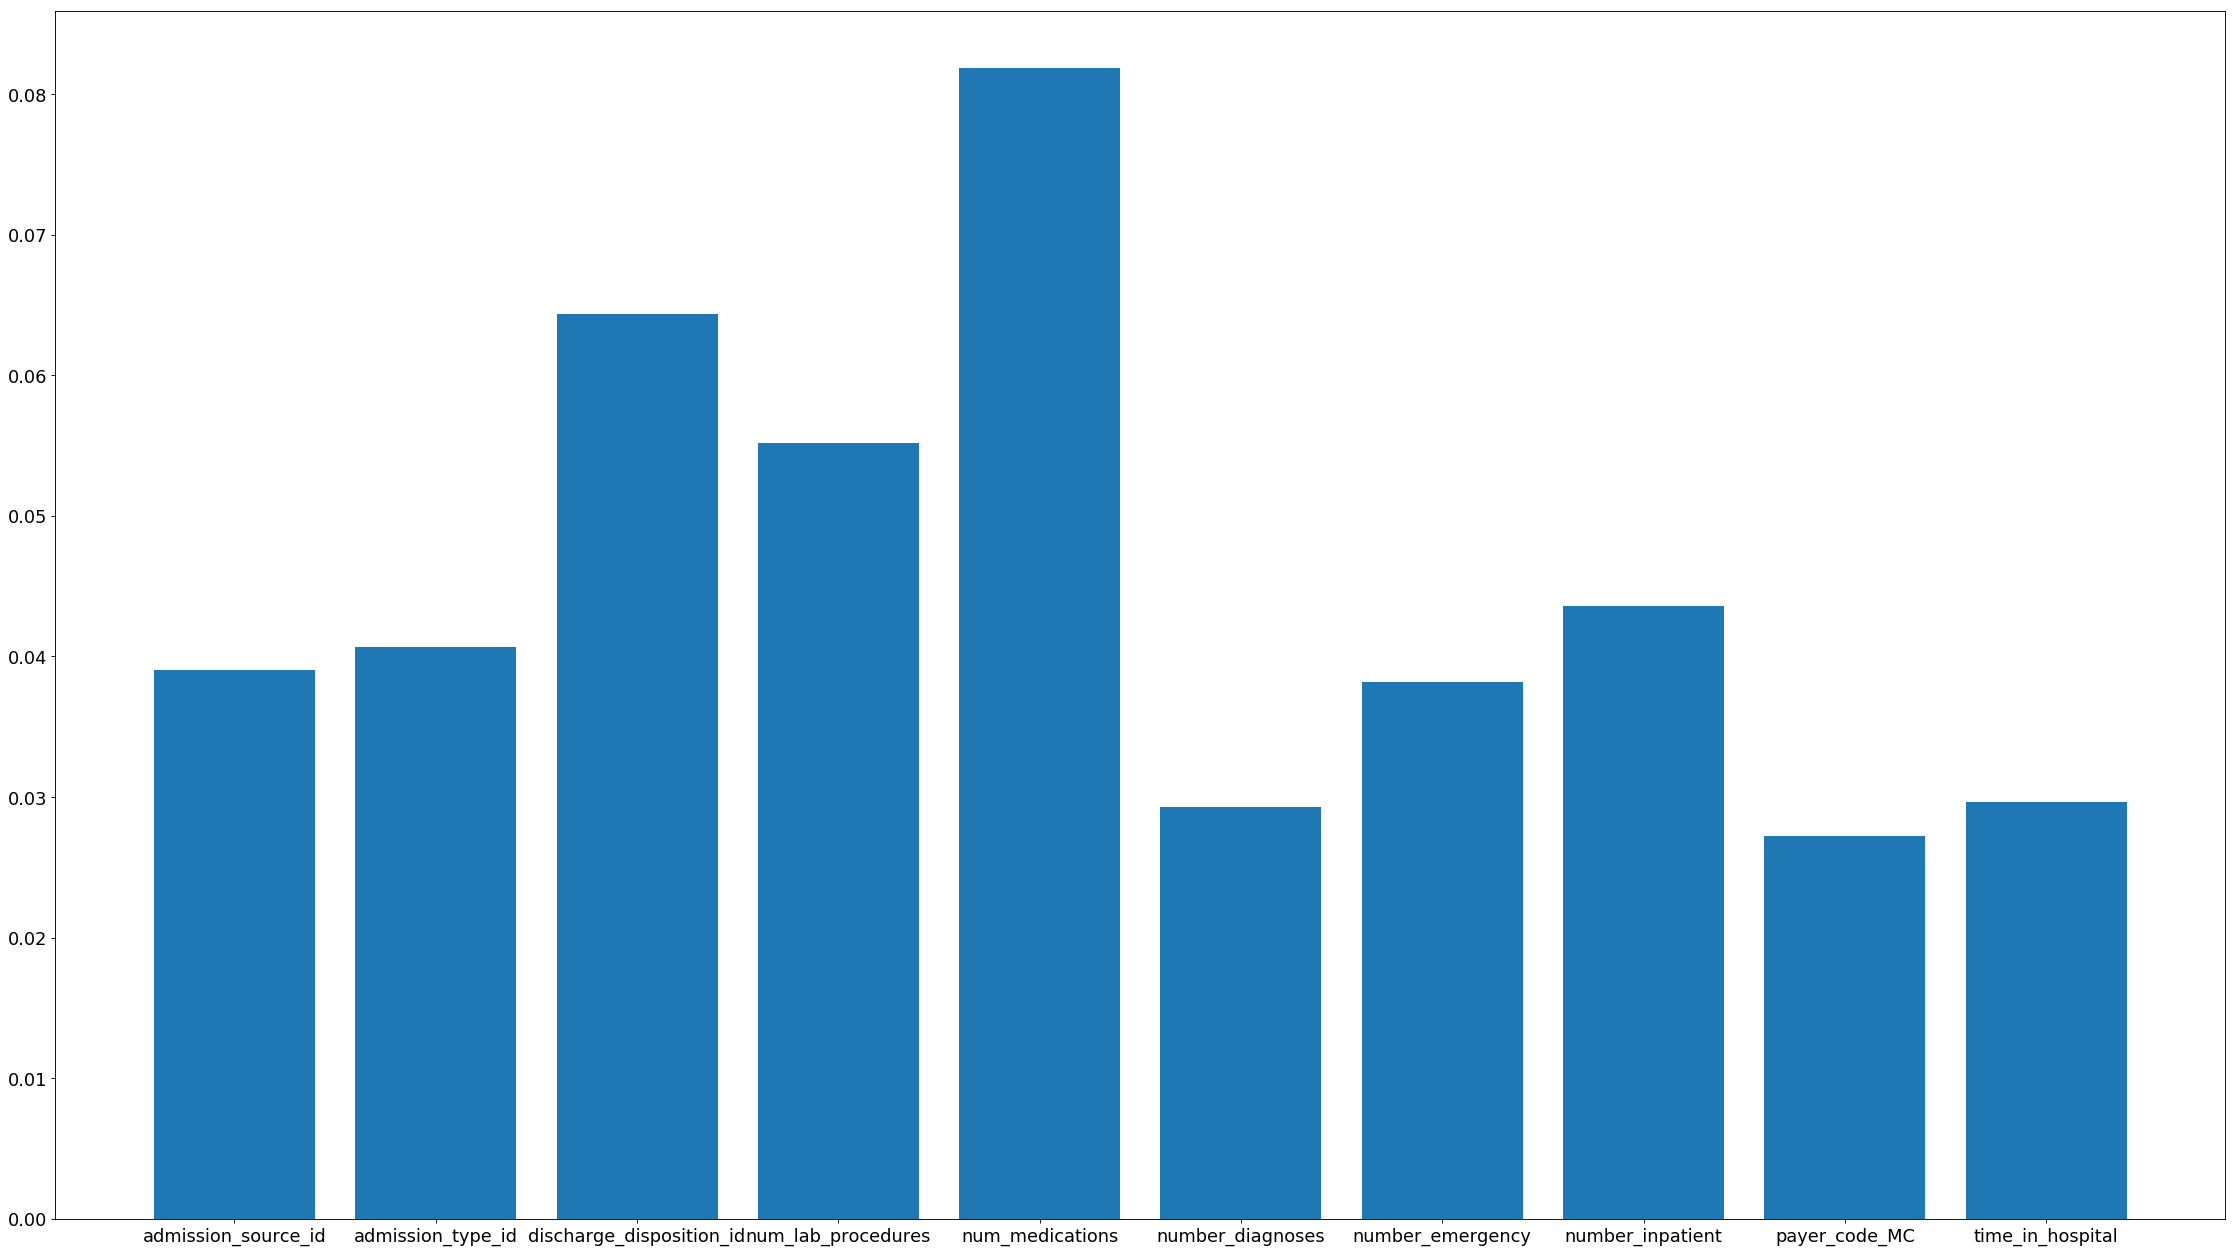

In [94]:
#graph the features
importance.sort_values(['Importance'], ascending=0)
importance_10=importance.nlargest(10, 'Importance')
from matplotlib.pyplot import figure
import matplotlib
matplotlib.rcParams.update({'font.size': 16})
figure(num=None, figsize=(35, 20), dpi=80, facecolor='w', edgecolor='k')
plt.bar(importance_10['feature'],importance_10['Importance']) 
plt.show() 

In [32]:
#lets Try Ridge regression to reduce size of coefficent
from sklearn.linear_model import RidgeClassifier
ridge_class = RidgeClassifier(alpha=.01, solver="cholesky", random_state=42)
ridge_class.fit(x_train, y_train_readmitted)

RidgeClassifier(alpha=0.01, class_weight=None, copy_X=True,
        fit_intercept=True, max_iter=None, normalize=False,
        random_state=42, solver='cholesky', tol=0.001)

In [33]:
y_test_pred = ridge_class.predict(x_test)
print(accuracy_score(y_test_readmitted, y_test_pred))

0.6131472929153975


In [37]:
#run an elastic net to reduce number of coefficents
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(x_train, y_train_rebin)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=42, selection='cyclic', tol=0.0001, warm_start=False)

In [41]:
y_test_pred = elastic_net.predict(x_test)
print(accuracy_score(y_test_rebin, y_test_pred.round()))

0.5848973174805935
